# Regression algorithms

The goal of this notebook is to manipulate some of the regression algorithms of [scikit-learn](http://scikit-learn.org/stable/documentation.html). We will also use the [pandas library](https://pandas.pydata.org/) to manipulate data.

This notebook was created by [Chloé-Agathe Azencott](http://cazencott.info).

This notebook was created using
* python 3.4.3
* numpy 1.15.0
* matplotlib 2.2.2
* scikit-learn 0.19.2

You can check your version of Python by running
```python
import sys
print(sys.version)
```

and the version of any module by running
```python
import <module name>
print(<module name>.__version__)
```

### Loading the data science libraries

In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## 1. Predicting prostate-specific antigen levels

Prostate-specific antigen, or PSA, is a protein produced by cells of the prostate gland. 

The concentration of PSA in a man's blood is often elevated in men with prostate cancer, and it is used to monitor the progression of prostate cancer. 

The goal of this lab is to predict the concentration of PSA (`lpsa`, given in log scale) from other clinical measurements, which are:
* `cavol`: the tumor volume (given in log scale)
* `lweight`: the weight of the prostate (given in log scale)
* `age`: the patient's age
* `lbph`: the volume of benign prostatic hyperplasia, that is to say, non-cancerous enlargement of the prostate (given in log scale)
* `svi`: whether the seminal vesical has been invaved by the cancer
* `lcp`: the capsular penetration, i.e. how much of the prostate capsule (= the membrane that surrounds the cancer gland) has been invaded by the cancer (given in log scale)
* `gleason`: the Gleason score given by the physician. The Gleason score is given by a histopathologist after having looked at a biopsy of the prostate. You can read more about the Gleason score here: http://www.wikiwand.com/en/Gleason_grading_system. 
* `pgg45`: the percentage of the tumor that is given a Gleason score of 4 or 5.

Data are available as `data/Prostate.csv`. Let us load them in a pandas DataFrame called `df`.

In [3]:
df = pd.read_csv('data/Prostate.csv', 
                 index_col=0 # the first column is the IDs of the samples
                )

Let us look at the first few lines of df

In [4]:
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


## 2. Preparing the data

## 2.1 Split the data into a train set and a test set

We will use the first 65 samples of the data for training our models, and the remaining samples to evaluate them. 

The last column, 'lpsa', is our target variable. 

Let us create the numpy arrays `Xtrain`, `Xtest` and the vectors `ytrain`, `ytest` that we will work with.

In [5]:
Xtrain = df.iloc[:65, # first 65 lines
                 :-1] # exclude last column
ytrain = df.iloc[:65, -1]

Xtest = df.iloc[65:, :-1]
ytest = df.iloc[65:, -1]

__Question :__ How many test samples do we have? How many features?

In [ ]:
# TODO


__Answer:__

## 2.2 Data standardization

One of the first things you can observe is that the values of the different features cover different ranges. 

In [ ]:
print("%.2e" % np.min(df['lcavol']), "%.2e" % np.max(df['lcavol']))

__Question : __ What is the range of the age variable? of the Gleason score?

In [ ]:
# TODO


__Answer :__

Because some methods will give more importance to the features with large absolute values of scores than to others, we will start by standardizing the data, i.e. making sure that each feature has a mean of 0 and a standard deviation of 1.

To do this, we need to substract to each feature its mean (across all available samples), and divide by its standard deviation (across all available samples).

__IMPORTANT__: Remember, we are pretending that the test set is hidden to us at learning time. This means we need to standardize the data _based on the training data only_.

We will use scikit-learn's [preprocessing.StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [6]:
from sklearn import preprocessing

# Create a standardizer object and fit it to the training data.
std_scale = preprocessing.StandardScaler().fit(Xtrain)

# Apply the standardization to the training and the test data.
Xtrain_std = std_scale.transform(Xtrain)
Xtest_std = std_scale.transform(Xtest)

## 2.3 Model selection by cross-validation
Remember, using the test data to select our best model is likely to result in _overfitting_. 

We will therefore start by splitting the training data into 5 folds of cross-validation. Scikit-learn also does that for us.

scikit-learn model selection: http://scikit-learn.org/stable/model_selection.html#model-selection

In [7]:
from sklearn import model_selection

# Créate a KFold object
kf = model_selection.KFold(n_splits=5,  # 5 folds
                           shuffle=True # shuffle the samples before splitting 
                          )

# Use kf to split Xtrain_std into 5 folds. 
# kf.split returns an iterator ((that would be consumed after one iteration). 
# We transform it in a list (on which we can iterate as often as we want).
kf_indices = list(kf.split(Xtrain_std))

In [ ]:
for i, (tr, te) in enumerate(kf_indices):
    print("Training data for fold %d:" % i, tr)
    print("Test data for fold %d:" % i, te)

__Question :__ Write code to compute the number of samples in each fold.

In [ ]:
# TODO

# 3. Linear models

We will use scikit-learn to train a few [linear models](http://scikit-learn.org/stable/modules/linear_model.html#linear-model) on `(Xtrain_std, ytrain_std)`.

In [8]:
from sklearn import linear_model

## 3.1 inear regression
How does a linear regression perform on this data? We'll evaluate it by cross-validation, using the cross-validation folds we have generated above.

But wait! What will our criterion be? There are several you can choose from on http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter. In this lab, we will use the Mean Squared Error.

__Question :__ What other criterion or criteria could you use?

__Annswer:__ 

Let us create a linear regression model.

In [9]:
model = linear_model.LinearRegression()

scikit-learn allows us to directly compute the cross-validated MSE (on the train test) of this model:

In [10]:
nmse = model_selection.cross_val_score(model, 
                                      Xtrain_std, y=ytrain, 
                                      scoring='neg_mean_squared_error', 
                                      cv=kf_indices)

print(["%.3f" % value for value in nmse])

['-0.217', '-0.459', '-0.383', '-0.290', '-0.533']


What we obtained here is the opposite ('neg') of the mean squared error, for each fold.

__Question:__ Why do you think scikit-learn implemented the _opposite_ of the mean squared error, rather than the mean squared error itself, or the more commonly used root mean squared error (i.e. the squared root of the mean squared error, usually denoted RMSE)?

__Answer:__

__Question:__ What is the average RMSE of the linear regression over all folds?

In [ ]:
# TODO

What are the weights that a linear regression assigns to each variable on the train set? To determine this, we will train a linear regression on the entire training data.

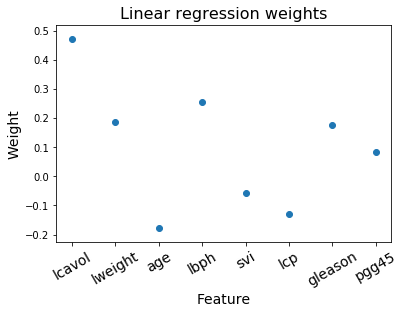

In [11]:
# Train a linear regression on the entire train set
model.fit(Xtrain_std, ytrain)

# Plot, for each feature, its coefficient in the model
num_features = Xtrain_std.shape[1]
plt.scatter(range(num_features), model.coef_)

plt.xlabel('Feature', fontsize=14)
tmp = plt.xticks(range(num_features), list(df.columns), rotation=30, fontsize=14)
tmp = plt.ylabel('Weight', fontsize=14)

tmp = plt.title('Linear regression weights', fontsize=16)

__Question:__ Which feature do you think is the most important to predict PSA levels? Which one is the least important?

In [ ]:
# TODO

__Answer:__

## 3.2 Ridge regression

Can we improve performance using regularization? Let us look at [ridge regression]( http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression):

Remember, in ridge regression there is a hyperparameter, called $\alpha$, that controls the amount of regularization we use. We will cross-validate a ridge regression on the training data for several values of $\alpha$.

Let us create 50 values of alpha for testing, equally spaced (in log scale) between $10^{-1}$ and $10^4$:

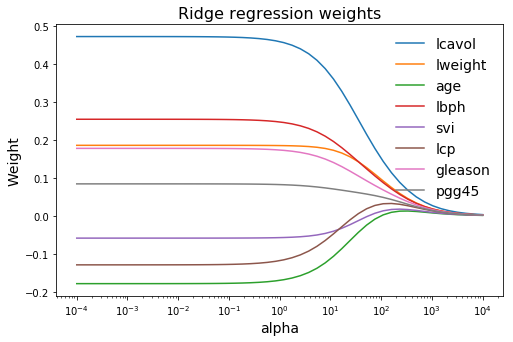

In [ ]:
alphas = np.logspace(-4, 4, 50)

nmse_per_alpha = [] # will store the -MSE values for all 50 values of alpha
weights_per_alpha = [] #  will store the weights associated with each feature 
                       # for all 50 values of alpha
for alf in alphas:
    # Create a regression ridge model
    model = linear_model.Ridge(alpha=alf)
    
    # Compute the model's cross-validated performance
    nmse = model_selection.cross_val_score(model, 
                                           Xtrain_std, y=ytrain, 
                                           scoring='neg_mean_squared_error', 
                                           cv=kf_indices)
    nmse_per_alpha.append(nmse)
    
    # Train the model on the entire data set and store the regression coefficients
    model.fit(Xtrain_std, ytrain)
    weights_per_alpha.append(model.coef_)
    
# Plot, for each feature, the regression weight as a function of alpha
fig = plt.figure(figsize=(8, 5))
lines = plt.plot(alphas, weights_per_alpha)
plt.xscale('log')
tmp = plt.legend(lines, list(df.columns), frameon=False, loc='upper right', fontsize=14)

tmp = plt.xlabel('alpha', fontsize=14)
tmp = plt.ylabel('Weight', fontsize=14)

tmp = plt.title('Ridge regression weights', fontsize=16)

__Question:__ Is this consistent with what we observed for the linear regression? 

__Answer:__

Let us now plot the RMSE (averaged across the 5 folds) as a function of alpha.

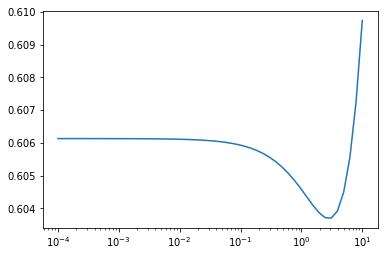

In [27]:
rmse = np.mean(np.sqrt(-np.array(nmse_per_alpha)), axis=1)
plt.plot(alphas, rmse)
plt.xscale('log')

__Question:__ How does the RMSE evolves when `alpha` grows?

__Answer:__

__Question:__ What is the optimal value of $\alpha$ and what is the corresponding average cross-validated RMSE? Use `np.argmin`.

In [ ]:
# TODO


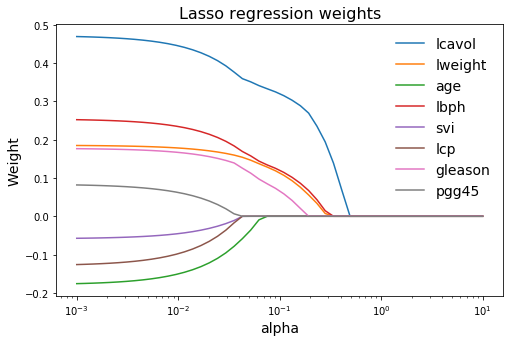

In [18]:
alphas = np.logspace(-3, 1, 50)

nmse_per_alpha = [] # will store the -MSE values for all 50 values of alpha
weights_per_alpha = [] #  will store the weights associated with each feature 
                       # for all 50 values of alpha
for alf in alphas:
    # Create a regression ridge model
    model = linear_model.Lasso(alpha=alf)
    
    # Compute the model's cross-validated performance
    nmse = model_selection.cross_val_score(model, 
                                           Xtrain_std, y=ytrain, 
                                           scoring='neg_mean_squared_error', 
                                           cv=kf_indices)
    nmse_per_alpha.append(nmse)
    
    # Train the model on the entire data set and store the regression coefficients
    model.fit(Xtrain_std, ytrain)
    weights_per_alpha.append(model.coef_)
    
# Plot, for each feature, the regression weight as a function of alpha
fig = plt.figure(figsize=(8, 5))
lines = plt.plot(alphas, weights_per_alpha)
plt.xscale('log')
tmp = plt.legend(lines, list(df.columns), frameon=False, loc='upper right', fontsize=14)

tmp = plt.xlabel('alpha', fontsize=14)
tmp = plt.ylabel('Weight', fontsize=14)

tmp = plt.title('Lasso regression weights', fontsize=16)

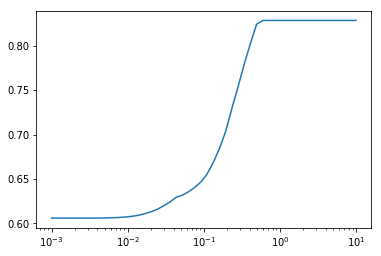

In [19]:
rmse = np.mean(np.sqrt(-np.array(nmse_per_alpha)), axis=1)
plt.plot(alphas, rmse)
plt.xscale('log')

__Answer:__

__Question:__ How does the regularized ridge regression compare to the linear regression?

__Answer:__

# 4. Non-linear models

Can non-linear models improve the performance on this data?

## 4.1 Random forest

We will create a random forest with 50 trees.

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
from sklearn import ensemble

model = ensemble.RandomForestRegressor(n_estimators=50)

# Compute the cross-validation performance of this model 
nmse = model_selection.cross_val_score(model, 
                                       Xtrain_std, y=ytrain, 
                                       scoring='neg_mean_squared_error', 
                                       cv=kf_indices)

print(nmse)

__Question:__ What is the average RMSE of the linear regression over all folds?

In [ ]:
# TODO

__Answer:__

Random forests assign a feature importance score to each variable (depending on how useful they are when building the model). Let us visualize them as we did the regression coefficients.

In [ ]:
model.fit(Xtrain_std, ytrain)

num_features = Xtrain_std.shape[1]
plt.scatter(range(num_features), model.feature_importances_)

plt.xlabel('Feature', fontsize=14)
tmp = plt.xticks(range(num_features), list(df.columns), rotation=30, fontsize=14)
tmp = plt.ylabel('Importance score', fontsize=14)

tmp = plt.title('Random forest feature importance', fontsize=16)

__Question:__ How does this compare to the features that had high weights in the linear regression?

__Answer:__

## 4.2 Optional questions:

* Repeat the analysis for several values of the number of trees in the forest.
* Use an SVM on the data? Which parameter(s) do you have to set? What is the best cross-validated RMSE you obtain? See: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

# 5. Final model

__Question:__ Based on the above analyses, which model do you finally choose as the most performant? What is its RMSE on the test set? 

In [ ]:
# TODO

__Answer:__